# 1. Import Libraries

In [1]:
# !pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [3]:
classes = ['angular_leaf_spot', 'bean_rust', 'healthy']

In [4]:
X = np.empty([0, 32*32*3])
y = np.empty([0, 1])

for _class in tqdm(classes):
    img_path = glob('dataset/' + _class + '/*')
    for path in tqdm(img_path):
        img = Image.open(path)
        img = img.resize([32, 32])
        img = np.array(img)
        if img.shape[2] == 4:
            img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        img = img.reshape(1, -1)
        X = np.vstack([X, img])
        if _class == 'healthy':
            y = np.vstack([y, 'healthy'])
        else:
            y = np.vstack([y, 'unhealthy'])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/336 [00:00<?, ?it/s]

  0%|          | 0/337 [00:00<?, ?it/s]

# ### 3. Clean Data

# 4. Split Dataset into Training & Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [7]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [8]:
clf = SVC()

## 6.2. Train Model

In [9]:
clf.fit(X_train_scaled, y_train)

SVC()

## 6.3. Model's Weight & Bias

In [10]:
clf.dual_coef_

array([[-0.58644646, -1.        , -0.12114572, -1.        , -1.        ,
        -0.50595981, -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -0.36768308, -1.        , -1.        ,
        -0.49111132, -0.8992981 , -1.        , -1.        , -1.        ,
        -0.89074658, -0.33756227, -0.76454979, -0.78302583, -0.5939367 ,
        -0.74887915, -1.        , -1.        , -0.50513546, -1.        ,
        -1.        , -1.        , -1.        , -0.42335095, -0.43893437,
        -1.        , -0.50033611, -0.62062689, -1.        , -0.33775617,
        -1.        , -0.28175372, -0.9585888 , -1.        , -0.16454332,
        -0.87816497, -1.        , -0.25768577, -1.        , -1.        ,
        -1.        , -0.23997317, -1.        , -1.        , -0.26714629,
        -1.        , -0.01311138, -0.76120924, -1.        , -0.67638334,
        -0.51600486, -1.        , -0.39230079, -0.48596424, -1.        ,
        -0.97798083, -1.        , -1.        , -1. 

In [11]:
clf.intercept_

array([-0.2160276])

# 7. Prediction

## 7.1. Training Set

In [12]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [13]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

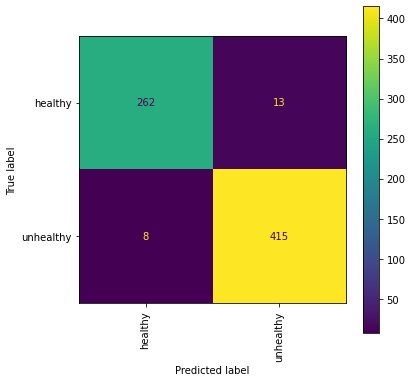

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_train_scaled, y_train, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.1.2. Scoring

In [15]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [16]:
print('accuracy =', report['accuracy'])

accuracy = 0.9699140401146131


In [17]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
healthy,0.970370,0.952727,0.961468,275.000000
unhealthy,0.969626,0.981087,0.975323,423.000000
accuracy,0.969914,0.969914,0.969914,0.969914
macro avg,0.969998,0.966907,0.968396,698.000000
weighted avg,0.969919,0.969914,0.969864,698.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

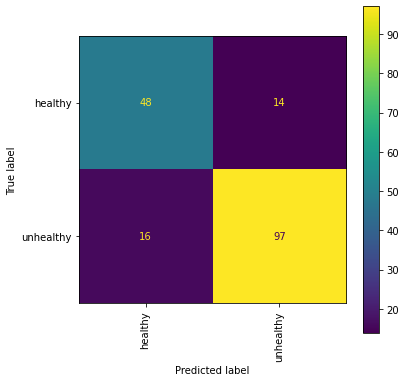

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_test_scaled, y_test, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.2.2. Scoring

In [19]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [20]:
print('accuracy =', report['accuracy'])

accuracy = 0.8285714285714286


In [21]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
healthy,0.750000,0.774194,0.761905,62.000000
unhealthy,0.873874,0.858407,0.866071,113.000000
accuracy,0.828571,0.828571,0.828571,0.828571
macro avg,0.811937,0.816300,0.813988,175.000000
weighted avg,0.829987,0.828571,0.829167,175.000000


# 9. Save Model

In [22]:
import pickle

In [23]:
pickle.dump((clf, 
             scaler),  open('support_vector_classification_model.pickle', 'wb'))